In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Loading train and test data

train = pd.read_csv("../Dataset/train_1.csv").drop("Unnamed: 0",1) 
test = pd.read_csv("../Dataset/test_1.csv").drop("Unnamed: 0",1) 

train.describe()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,TARGET
count,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000
mean,0.037315,0.030631,0.039962,0.184150,0.543413,0.991147,0.500501
std,0.035598,0.035900,0.016937,0.016796,0.017745,0.018823,0.500041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021944,0.015890,0.037722,0.181454,0.537441,0.990656,0.000000
50%,0.032606,0.026506,0.038154,0.183205,0.542153,0.993238,1.000000
75%,0.038171,0.033102,0.038587,0.185093,0.545789,0.995970,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


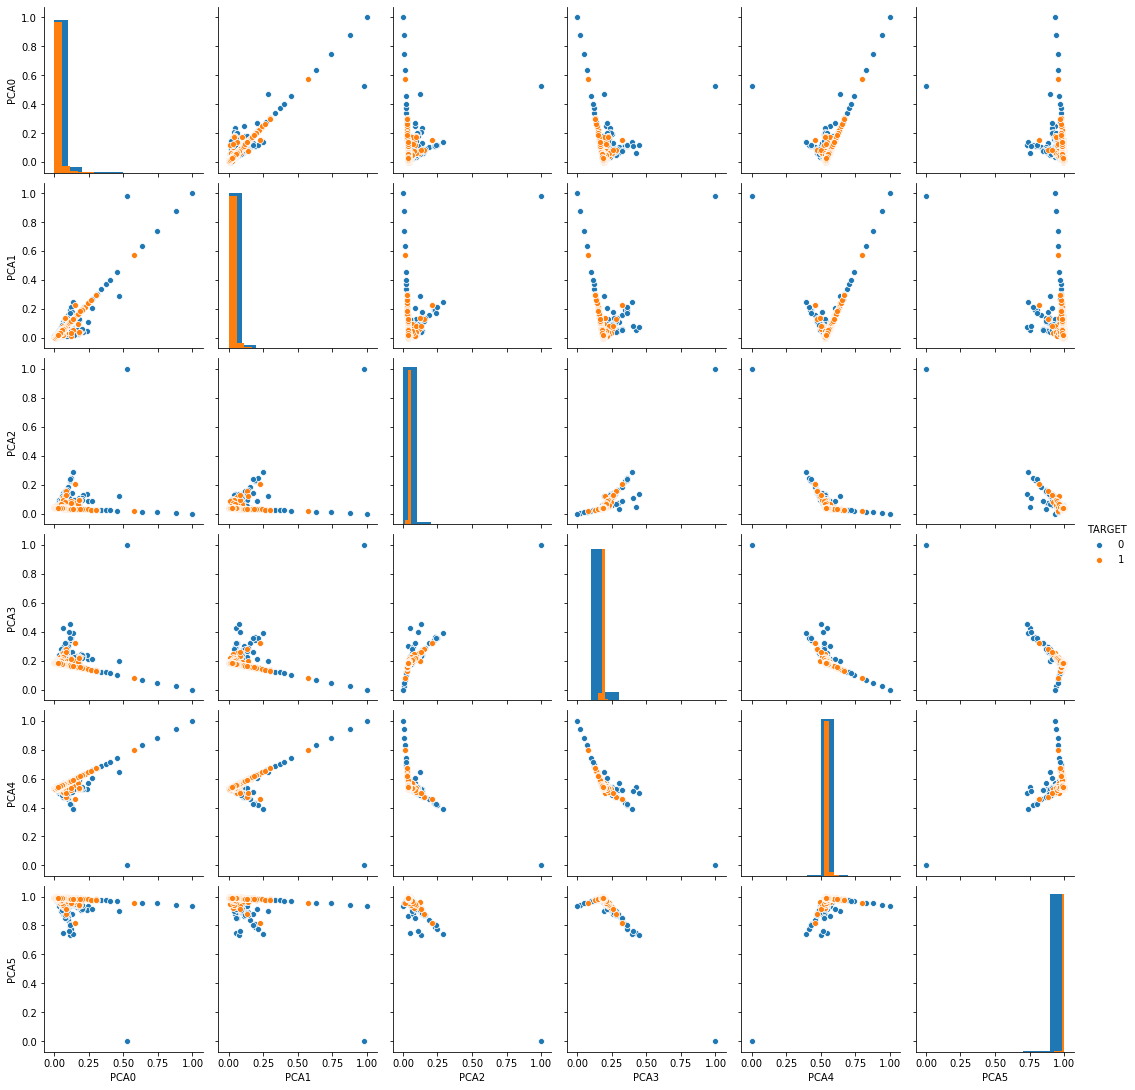

In [3]:
# Making pairplot

sns.pairplot(train, hue="TARGET", diag_kind = 'hist')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PCA0, dtype: object

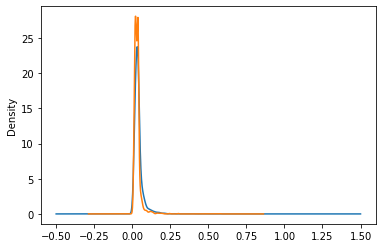

In [4]:
# Analysing PCA0

train.groupby("TARGET").PCA0.plot(kind='kde')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PCA1, dtype: object

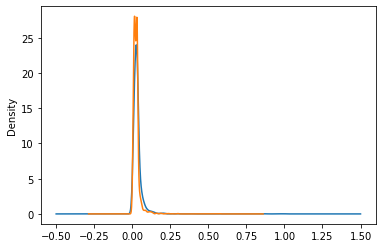

In [5]:
# Analysing PCA1

train.groupby("TARGET").PCA1.plot(kind='kde')

In [6]:
# Checking correlation of remaining variables to the target variable

abs(train.corr(method = 'pearson')["TARGET"]).sort_values()

PCA4      0.038803
PCA3      0.060487
PCA2      0.086202
PCA5      0.107722
PCA1      0.108367
PCA0      0.123362
TARGET    1.000000
Name: TARGET, dtype: float64

In [7]:
# Saving data

train.to_csv("../Dataset/train_2.csv")
test.to_csv("../Dataset/test_2.csv")